# Tweak

We show how to tweak some of the parameters of the pipeline
using the example pages in the *example* directory.

Reference: [book](https://among.github.io/fusus/fusus/book.html).

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from fusus.book import Book

In [3]:
B = Book(cd="~/github/among/fusus/example")

In [4]:
# cd to the book directory
!cd `pwd`

# Settings

Learn how to show and edit settings.

Here is the
[documentation](https://among.github.io/fusus/fusus/parameters.html)
of all customizable settings.

Inspect the settings, first a single setting, then two, then all.

In [5]:
B.showSettings(params="blurX")

blurX                          = 21


In [6]:
B.showSettings(params="blurX,blurY")

blurX                          = 21
blurY                          = 21


In [7]:
B.showSettings()

accuracy                       = 0.8
bandBroad                      = (-15, 10)
bandHigh                       = (10, 30)
bandInter                      = (5, 5)
bandLow                        = (-10, -10)
bandMain                       = (5, -5)
bandMid                        = (10, -5)
blockMarginX                   = 12
blurX                          = 21
blurY                          = 21
boxBorder                      = 3
cleanDir                       = clean
connectBorder                  = 4
connectRatio                   = 0.1
connectThreshold               = 40000
contourFactor                  = 0.3
contourOffset                  = 0.04
debug                          = 0
defaultLineHeight              = 200
inDir                          = in
interDir                       = inter
marginThresholdX               = 1
marksDir                       = marks
maxHits                        = 5000
outDir                         = out
outerValleyShiftFraction       = 0.3
peakPromin

Change settings.

In [8]:
B.configure(blurX=11, blurY=3)
B.showSettings(params="blurX,blurY")

blurX                          = 11
blurY                          = 3


Reset individual parameters:

In [9]:
B.configure(blurX=None)
B.showSettings(params="blurX,blurY")

blurX                          = 21
blurY                          = 3


Reset all parameters:

In [10]:
B.configure(reset=True)
B.showSettings(params="blurX,blurY")

blurX                          = 21
blurY                          = 21


# Bands

Bands are regions relative to lines where we look for spots to wipe clean.

Every band has a name and is defined by vertical offsets with respect to the line boxes.

If needed they can be visualised on the page as rectangles with colored borders.

Here they are:

In [11]:
B.availableBands()

Available bands and their offsets
	«broad»   : top= -15, bottom=  10
	«high»    : top=  10, bottom=  30
	«inter»   : top=   5, bottom=   5
	«low»     : top= -10, bottom= -10
	«main»    : top=   5, bottom=  -5
	«mid»     : top=  10, bottom=  -5


## How are the bands computed?

The `main` band is computed directly from the histogram in such a way that almost
all ink of a line falls in it.

The `broad` band is a wider variant of `main`.

The `mid` band is a narrower variant of `main`.

The `inter` band is computed from the histogram in such a way that almost all the
interline space falls in it.

The `high` band is variant of `inter`, so that the upper interlinear space falls in it.

The `low` band is variant of `inter`, so that the lower interlinear space falls in it.

The `top` and `bottom` numbers show how much the top and bottom boundaries have been shifted
with respect to the band they are based on.

A negative value shifts up, a positive value shifts down.

## Customizing bands

If you want to shift the boundaries of the bands,
change the offsets:

Suppose you want to widen the `mid`  band, then you can proceed as follows:

In [12]:
B.configure(bandMid=(20,20))
B.showSettings(params="bandMid")
B.availableBands()

bandMid                        = (20, 20)
Available bands and their offsets
	«broad»   : top= -15, bottom=  10
	«high»    : top=  10, bottom=  30
	«inter»   : top=   5, bottom=   5
	«low»     : top= -10, bottom= -10
	«main»    : top=   5, bottom=  -5
	«mid»     : top=  20, bottom=  20


You can change back to the default:

In [13]:
B.configure(bandMid=None)
B.showSettings(params="bandMid")
B.availableBands()

bandMid                        = (10, -5)
Available bands and their offsets
	«broad»   : top= -15, bottom=  10
	«high»    : top=  10, bottom=  30
	«inter»   : top=   5, bottom=   5
	«low»     : top= -10, bottom= -10
	«main»    : top=   5, bottom=  -5
	«mid»     : top=  10, bottom=  -5


# Marks

Marks are inky spots or small signs that we want to remove in a process called cleaning.
We find marks by example: an image of the mark is used as a search template,
and a more or less fuzzy search is conducted with that template.

There are two parameters involved in finding marks in a band:

*   `acc` (= `accuracy`): float: between 0 and 1: the level of accuracy in matching.
    The lower, the fuzzier the matches.
*   `bw` (= `connectBorder`): integer: border width. In order to avoid false matches of marks,
    a match only counts if there is no ink connection between the match and the region
    around it.
    In order to determine that, an inner and outer border around the match is investigated.
    This parameter is the width of those borders.
*   `r` (= `connectRatio`): float: the level of ink connectedness that is acceptable.

There are fixed defaults for `acc` and `bw` and `r`, but you can change them in various places.

## Customizing marks

Here are the marks for this book, with their current parameter settings.

Marks and their settings
	band [high]
		  1: «a»                  acc=0.8, bw=4, r=0.1


		  2: «footnote1»          acc=0.8, bw=4, r=0.1


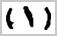

		  3: «footnote2»          acc=0.8, bw=4, r=0.1


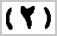

		  4: «footnote3»          acc=0.8, bw=4, r=0.1


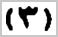

		  5: «footnote4»          acc=0.8, bw=4, r=0.1


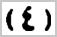

		  6: «footnote5»          acc=0.8, bw=4, r=0.1


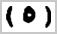

		  7: «footnote6»          acc=0.8, bw=4, r=0.1


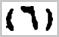

		  8: «footnote7»          acc=0.8, bw=4, r=0.1


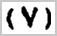

		  9: «footnote8»          acc=0.8, bw=4, r=0.1


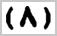

		 11: «shadda.a»           acc=0.8, bw=4, r=0.1


		 10: «shadda.a.2»         acc=0.8, bw=4, r=0.1


		 12: «u»                  acc=0.8, bw=4, r=0.1


		 13: «un»                 acc=0.8, bw=4, r=0.1


	band [low]
		 14: «a»                  acc=0.8, bw=4, r=0.1


		 15: «dash»               acc=0.8, bw=4, r=0.1


	band [mid]
		 16: «bracketClose»       acc=0.8, bw=4, r=0.1


		 17: «bracketOpen»        acc=0.8, bw=4, r=0.1


		 18: «colon»              acc=0.8, bw=4, r=0.1


		 19: «comma»              acc=0.8, bw=4, r=0.1


		 20: «comma2»             acc=0.8, bw=4, r=0.1


		 21: «guillemetClose»     acc=0.8, bw=4, r=0.1


		 22: «guillemetOpen»      acc=0.8, bw=4, r=0.1


		 23: «question»           acc=0.8, bw=4, r=0.1


		 24: «semicolon»          acc=0.8, bw=4, r=0.1


In [14]:
B.availableMarks()

We can customize the defaults:

accuracy                       = 0.3
connectBorder                  = 8
Marks and their settings
	band [high]
		  1: «a»                  acc=0.3, bw=8, r=0.1


		  2: «footnote1»          acc=0.3, bw=8, r=0.1


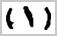

		  3: «footnote2»          acc=0.3, bw=8, r=0.1


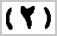

		  4: «footnote3»          acc=0.3, bw=8, r=0.1


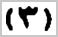

		  5: «footnote4»          acc=0.3, bw=8, r=0.1


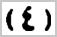

		  6: «footnote5»          acc=0.3, bw=8, r=0.1


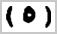

		  7: «footnote6»          acc=0.3, bw=8, r=0.1


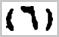

		  8: «footnote7»          acc=0.3, bw=8, r=0.1


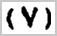

		  9: «footnote8»          acc=0.3, bw=8, r=0.1


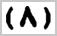

		 11: «shadda.a»           acc=0.3, bw=8, r=0.1


		 10: «shadda.a.2»         acc=0.3, bw=8, r=0.1


		 12: «u»                  acc=0.3, bw=8, r=0.1


		 13: «un»                 acc=0.3, bw=8, r=0.1


	band [low]
		 14: «a»                  acc=0.3, bw=8, r=0.1


		 15: «dash»               acc=0.3, bw=8, r=0.1


	band [mid]
		 16: «bracketClose»       acc=0.3, bw=8, r=0.1


		 17: «bracketOpen»        acc=0.3, bw=8, r=0.1


		 18: «colon»              acc=0.3, bw=8, r=0.1


		 19: «comma»              acc=0.3, bw=8, r=0.1


		 20: «comma2»             acc=0.3, bw=8, r=0.1


		 21: «guillemetClose»     acc=0.3, bw=8, r=0.1


		 22: «guillemetOpen»      acc=0.3, bw=8, r=0.1


		 23: «question»           acc=0.3, bw=8, r=0.1


		 24: «semicolon»          acc=0.3, bw=8, r=0.1


In [15]:
B.configure(accuracy=0.3, connectBorder=8)
B.showSettings(params="accuracy,connectBorder")
B.availableMarks()

We change it back:

accuracy                       = 0.8
connectBorder                  = 4
Marks and their settings
	band [high]
		  1: «a»                  acc=0.8, bw=4, r=0.1


		  2: «footnote1»          acc=0.8, bw=4, r=0.1


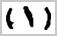

		  3: «footnote2»          acc=0.8, bw=4, r=0.1


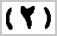

		  4: «footnote3»          acc=0.8, bw=4, r=0.1


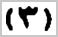

		  5: «footnote4»          acc=0.8, bw=4, r=0.1


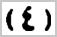

		  6: «footnote5»          acc=0.8, bw=4, r=0.1


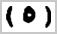

		  7: «footnote6»          acc=0.8, bw=4, r=0.1


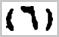

		  8: «footnote7»          acc=0.8, bw=4, r=0.1


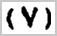

		  9: «footnote8»          acc=0.8, bw=4, r=0.1


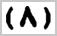

		 11: «shadda.a»           acc=0.8, bw=4, r=0.1


		 10: «shadda.a.2»         acc=0.8, bw=4, r=0.1


		 12: «u»                  acc=0.8, bw=4, r=0.1


		 13: «un»                 acc=0.8, bw=4, r=0.1


	band [low]
		 14: «a»                  acc=0.8, bw=4, r=0.1


		 15: «dash»               acc=0.8, bw=4, r=0.1


	band [mid]
		 16: «bracketClose»       acc=0.8, bw=4, r=0.1


		 17: «bracketOpen»        acc=0.8, bw=4, r=0.1


		 18: «colon»              acc=0.8, bw=4, r=0.1


		 19: «comma»              acc=0.8, bw=4, r=0.1


		 20: «comma2»             acc=0.8, bw=4, r=0.1


		 21: «guillemetClose»     acc=0.8, bw=4, r=0.1


		 22: «guillemetOpen»      acc=0.8, bw=4, r=0.1


		 23: «question»           acc=0.8, bw=4, r=0.1


		 24: «semicolon»          acc=0.8, bw=4, r=0.1


In [16]:
B.configure(accuracy=None, connectBorder=None)
B.showSettings(params="accuracy,connectBorder")
B.availableMarks()